<a href="https://colab.research.google.com/github/khushbooyadav6591/Hello-World/blob/master/Advance_ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**Assignment** : Advance Machine Learning Assignment 1



---




*   **Author** : Khushboo Yadav
*   **Data**   : IMDB dataset
*   **Goal**   : To explore and extend original Neural Network model
￼￼￼


---















#**Original Model**



#### Key Features of the original model:-


* 16 nodes in each layer

* relu activation function

* Optimiser: rmsprop

* loss function: binary_crossentrophy

We are considering this model as original model and will be using its results for understanding of neural networks and performing some experimental changes to improve the performance of the model.



















In [13]:
#Importing libraries

import keras
keras.__version__
import pandas as pd
import matplotlib.pyplot as plt # plotting
import random


In [14]:
#Import imdb dataset
from keras.datasets import imdb


In [15]:
#Import train and test data from imdb data
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [16]:

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 4s 80ms/step - loss: 0.5968 - accuracy: 0.6990 - val_loss: 0.3999 - val_accuracy: 0.8717
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3351 - accuracy: 0.9055 - val_loss: 0.3130 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2315 - accuracy: 0.93

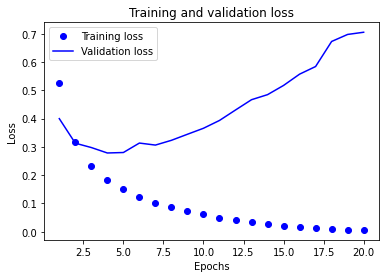

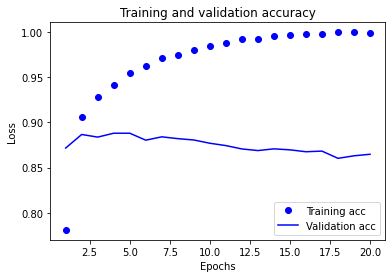

In [17]:
#Network Building
from keras import models
from keras import layers
import tensorflow as tf
tf.random.set_seed(7)

orig_model = models.Sequential()
orig_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
orig_model.add(layers.Dense(16, activation='relu'))
orig_model.add(layers.Dense(1, activation='sigmoid'))

orig_model.summary()

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 
orig_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Creating Validation Set: setting apart 10,000 samples from the original training data:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Model Training
orig_history = orig_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

orig_history_dict = orig_history.history
orig_history_dict.keys()

# Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

orig_accuracy = orig_history.history['accuracy']
orig_val_accuracy = orig_history.history['val_accuracy']
orig_loss = orig_history.history['loss']
orig_val_loss = orig_history.history['val_loss']

epochs = range(1, len(orig_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, orig_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, orig_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
orig_acc_values = orig_history_dict['accuracy']
orig_val_acc_values = orig_history_dict['val_accuracy']

plt.plot(epochs, orig_accuracy, 'bo', label='Training acc')
plt.plot(epochs, orig_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Observations:
 * The training loss decreases with every epoch and the training accuracy increases with every epoch. 
 * The validation loss and accuracy seems rise at 4th Epoch
  
 * This model is performing   better on the training data but not on the validation data for both loss and accuracy.  This is an "overfitting" situation.


 Let's retrain the model with keeping only 4 Epochs and validate the results on the validation data.


In [18]:
#Retraining the model with 4 Epochs

tf.random.set_seed(8)

orig_retrained_model = models.Sequential()
orig_retrained_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
orig_retrained_model.add(layers.Dense(16, activation='relu'))
orig_retrained_model.add(layers.Dense(1, activation='sigmoid'))


orig_retrained_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

orig_retrained_model.fit(x_train, y_train, epochs=4, batch_size=512)
orig_results = orig_retrained_model.evaluate(x_test, y_test)

print(orig_results)

orig_retrained_model.predict(x_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5551 - accuracy: 0.7433
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2788 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2075 - accuracy: 0.9259
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2915 - accuracy: 0.8842
[0.2914949357509613, 0.8842399716377258]


array([[0.18942767],
       [0.9997946 ],
       [0.9209652 ],
       ...,
       [0.14396375],
       [0.07375705],
       [0.61732715]], dtype=float32)

Observations:-
* After retraining the original model we can see that the performance has been improved .
* Let's try to validate the performance of the original model by playing with the layers.

Lets create a new model with 1 dense layer  instead of 2.

In [19]:
orig_results[0]

0.2914949357509613

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5604 - accuracy: 0.7261 - val_loss: 0.3893 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.3271 - accuracy: 0.8971 - val_loss: 0.3114 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2449 - accuracy: 0.9260 - val_loss: 0.3046 - val_accuracy: 0.8759
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2042 - accuracy: 0.9373 - val_loss: 0.2795 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1634 - accuracy: 0.9528 - val_loss: 0.2744 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1399 - accuracy: 0.9607 - val_loss: 0.2865 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1251 - accuracy: 0.9665 - val_loss: 0.2802 - val_accuracy: 0.8874
Epoch 8/20
30

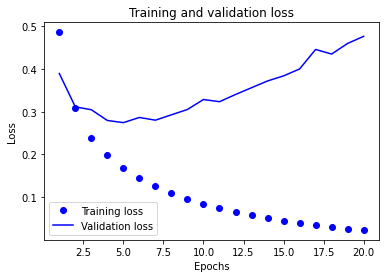

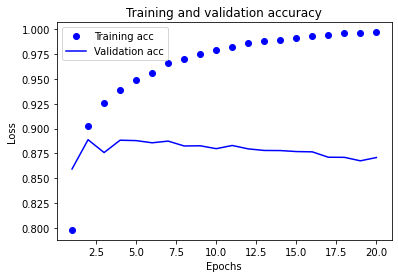

In [20]:

#model 2 : 1 hidden layer

#Network Building
from keras import models
from keras import layers

tf.random.set_seed(9)

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#smaller_model.add(layers.Dense(16, activation='relu'))# removed one hidden layer
smaller_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

smaller_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



#Creating Validation Set:setting apart 10,000 samples from the original training data:
#x_val = x_train[:10000]
#partial_x_train = x_train[10000:]

#y_val = y_train[:10000]
#partial_y_train = y_train[10000:]

# Model Training
smaller_model_history = smaller_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

smaller_model_history_dict = smaller_model_history.history
smaller_model_history_dict.keys()

#Plot the training and validation loss side by side, as well as the training and validation accuracy:
import matplotlib.pyplot as plt

smaller_model_history_accuracy = smaller_model_history.history['accuracy']
smaller_model_history_val_accuracy = smaller_model_history.history['val_accuracy']
smaller_model_history_loss = smaller_model_history.history['loss']
smaller_model_history_val_loss = smaller_model_history.history['val_loss']

epochs = range(1, len(smaller_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, smaller_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, smaller_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, smaller_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Observations:-

* It seems that Accuracy and loss are not any good on validation as compared to Training.

* However after epoch 5 the difference is getting in the chart.
* Let's retrained the model with epoch =5.and check the results :-


In [21]:
#Retraining the  smaller Model with 5 Epochs
tf.random.set_seed(12)

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#smaller_model.add(layers.Dense(16, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

smaller_model.fit(x_train, y_train, epochs=5, batch_size=512)
smaller_model_results = smaller_model.evaluate(x_test, y_test)

print(smaller_model_results)

smaller_model.predict(x_test)

Epoch 1/5
49/49 [==============================] - 2s 28ms/step - loss: 0.5320 - accuracy: 0.7600
Epoch 2/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2842 - accuracy: 0.9093
Epoch 3/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2225 - accuracy: 0.9242
Epoch 4/5
49/49 [==============================] - 1s 28ms/step - loss: 0.1826 - accuracy: 0.9416
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2955 - accuracy: 0.8819
[0.2954699695110321, 0.881879985332489]


array([[0.16465464],
       [0.9998299 ],
       [0.79364634],
       ...,
       [0.12005672],
       [0.06393087],
       [0.5408848 ]], dtype=float32)

Observations:-

* the average loss is 29% and accuracy is 88.18%.If we compare the results from the original retrained model it was 29% loss and 88.49% accuracy.

* As per the result we dont find much difference in the performance of the model.

Let's try to increase the layer to 3 from 2 and check results .

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6442 - accuracy: 0.5738 - val_loss: 0.5247 - val_accuracy: 0.8549
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4207 - accuracy: 0.8877 - val_loss: 0.3500 - val_accuracy: 0.8724
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2593 - accuracy: 0.9241 - val_loss: 0.3014 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1840 - accuracy: 0.9463 - val_loss: 0.2910 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1397 - accuracy: 0.9607 - val_loss: 0.3095 - val_accuracy: 0.8769
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1152 - accuracy: 0.9661 - val_loss: 0.3095 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0818 - accuracy: 0.9796 - val_loss: 0.3248 - val_accuracy: 0.8843
Epoch 8/20
30

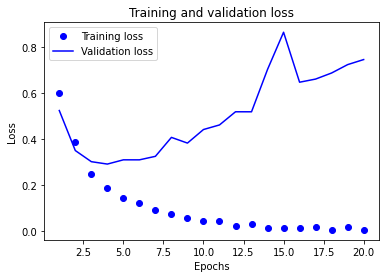

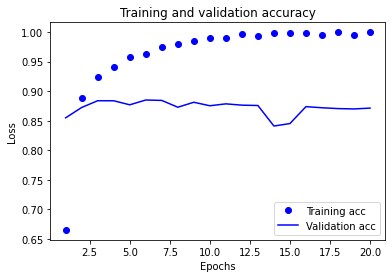

In [22]:

#model 3 : 3 layer,rest same

#Network Building

from keras import models
from keras import layers

tf.random.set_seed(10)

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(16, activation='relu'))
bigger_model.add(layers.Dense(16, activation='relu'))

bigger_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

bigger_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



#Creating Validation Set:setting apart 10,000 samples from the original training data:

#x_val = x_train[:10000]
#partial_x_train = x_train[10000:]

#y_val = y_train[:10000]
#partial_y_train = y_train[10000:]

#Training the Model
bigger_model_history = bigger_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

bigger_model_history_dict = bigger_model_history.history
bigger_model_history_dict.keys()

#Plot the training and validation loss side by side, as well as the training and validation accuracy:
import matplotlib.pyplot as plt

bigger_model_history_accuracy = bigger_model_history.history['accuracy']
bigger_model_history_val_accuracy = bigger_model_history.history['val_accuracy']
bigger_model_history_loss = bigger_model_history.history['loss']
bigger_model_history_val_loss = bigger_model_history.history['val_loss']

epochs = range(1, len(bigger_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, bigger_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, bigger_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, bigger_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, bigger_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Observations:
* It seems that accuracy has improved howvever the loss has increases as compared to the original model in the chart.
* let's try to retrain the model with 4 epochs as the validation loss and accuracy seems rise at 4th Epoch.

In [23]:
#Retraining the  bigger model with 4 Epochs

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(16, activation='relu'))
bigger_model.add(layers.Dense(16, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

bigger_model.fit(x_train, y_train, epochs=4, batch_size=512)
bigger_model_results = bigger_model.evaluate(x_test, y_test)

print(bigger_model_results)

bigger_model.predict(x_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.6032 - accuracy: 0.7081
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2984 - accuracy: 0.9032
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2067 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3130 - accuracy: 0.8794
[0.31297555565834045, 0.8794400095939636]


array([[0.18358701],
       [0.9999654 ],
       [0.98800844],
       ...,
       [0.10272911],
       [0.11742598],
       [0.82172674]], dtype=float32)

Observation:-
* as we can see that loss has increased to 31% from 29% and accuracy has gone down. It seems we are in the wrong direction and need to explore  other methods to improve the performance of the model.

Let's try to reduce the nodes in the hidden layer  and validate the results:-

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6060 - accuracy: 0.6934 - val_loss: 0.4219 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3584 - accuracy: 0.8909 - val_loss: 0.3271 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2602 - accuracy: 0.9237 - val_loss: 0.3127 - val_accuracy: 0.8750
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2062 - accuracy: 0.9354 - val_loss: 0.2854 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1660 - accuracy: 0.9489 - val_loss: 0.2770 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1414 - accuracy: 0.9578 - val_loss: 0.2848 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1162 - accuracy: 0.9673 - val_loss: 0.2881 - val_accuracy: 0.8866
Epoch 8/20
30

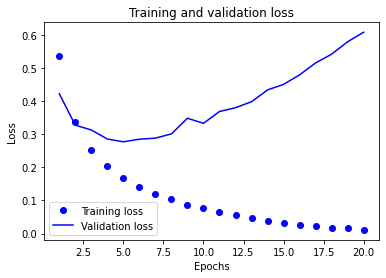

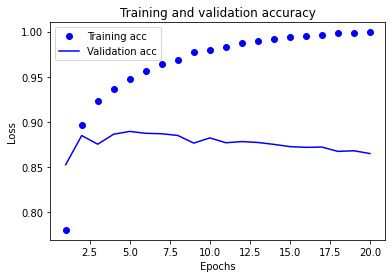

In [24]:
#Model 4 = less nodes
#Building Network
tf.random.set_seed(11)

from keras import models
from keras import layers

lessunits_model = models.Sequential()
lessunits_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
lessunits_model.add(layers.Dense(8, activation='relu'))
lessunits_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

lessunits_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



#Creating Validation Set:setting apart 10,000 samples from the original training data:

#x_val = x_train[:10000]
#partial_x_train = x_train[10000:]

#y_val = y_train[:10000]
#partial_y_train = y_train[10000:]

#Training the Model
lessunits_model_history = lessunits_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

lessunits_model_history_dict = lessunits_model_history.history
lessunits_model_history_dict.keys()

# Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

lessunits_model_history_accuracy = lessunits_model_history.history['accuracy']
lessunits_model_history_val_accuracy = lessunits_model_history.history['val_accuracy']
lessunits_model_history_loss = lessunits_model_history.history['loss']
lessunits_model_history_val_loss = lessunits_model_history.history['val_loss']

epochs = range(1, len(lessunits_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, lessunits_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, lessunits_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, lessunits_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, lessunits_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Observations:-
* Afer reducing the units , we can see some change in the results of the charts for accuracy and loss.
* As per the results ,It seems that with the increase in the epochs the difference in the loss for training and validation has increased, however accuracy seems to be improved.
* At Epoch 5 , the difference starts to increase. Lets retarin the model with epoch=5 and validate the results.




In [ ]:
#Retraining the LessUnit_Model with 5 Epochs
tf.random.set_seed(13)

lessunits_model = models.Sequential()
lessunits_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
lessunits_model.add(layers.Dense(16, activation='relu'))
lessunits_model.add(layers.Dense(1, activation='sigmoid'))

lessunits_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

lessunits_model.fit(x_train, y_train, epochs=5, batch_size=512)
lessunits_model_results = lessunits_model.evaluate(x_test, y_test)

print(lessunits_model_results)

lessunits_model.predict(x_test)

Epoch 1/5


Oberservations:
loss function=31% accuracy=87.9%

This model has not improved the performance.


In [ ]:
#Model 7 = more nodes
#Building Network
import tensorflow as tf

tf.random.set_seed(27)

from keras import models
from keras import layers

moreunits_model = models.Sequential()
moreunits_model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
moreunits_model.add(layers.Dense(32, activation='relu'))
moreunits_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

moreunits_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



#Creating Validation Set:setting apart 10,000 samples from the original training data:

#x_val = x_train[:10000]
#partial_x_train = x_train[10000:]

#y_val = y_train[:10000]
#partial_y_train = y_train[10000:]

#Training the Model
moreunits_model_history = lessunits_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

moreunits_model_history_dict = moreunits_model_history.history
moreunits_model_history_dict.keys()

# Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

moreunits_model_history_accuracy = moreunits_model_history.history['accuracy']
moreunits_model_history_val_accuracy = moreunits_model_history.history['val_accuracy']
moreunits_model_history_loss = moreunits_model_history.history['loss']
moreunits_model_history_val_loss = moreunits_model_history.history['val_loss']

epochs = range(1, len(moreunits_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, moreunits_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, moreunits_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, moreunits_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, moreunits_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Lets try with Epoch=4 to retrain the model.

In [ ]:
#Retraining the moreunit_Model with 4 Epochs
tf.random.set_seed(13)

moreunits_model = models.Sequential()
moreunits_model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
moreunits_model.add(layers.Dense(32, activation='relu'))
moreunits_model.add(layers.Dense(1, activation='sigmoid'))

moreunits_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

moreunits_model.fit(x_train, y_train, epochs=4, batch_size=512)
moreunits_model_results = lessunits_model.evaluate(x_test, y_test)

print(moreunits_model_results)

moreunits_model.predict(x_test)

Observations:-

* the average loss is 95% and accuracy is 84.73%.If we compare the results from the original retrained model it was 29% loss and 88.49% accuracy.

* As per the result we dont find much difference in the performance of the model.

Let's try to use MSE loss function instead of binary_crossentropy loss function and check results .

In [ ]:
#Model 5 = MSE loss function

#Building the network
from keras import models
from keras import layers
tf.random.set_seed(14)

mse_model = models.Sequential()
mse_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mse_model.add(layers.Dense(16, activation='relu'))
mse_model.add(layers.Dense(1, activation='sigmoid'))



# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

mse_model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])



#Creating Validation Set:setting apart 10,000 samples from the original training data:

#x_val = x_train[:10000]
#partial_x_train = x_train[10000:]

#y_val = y_train[:10000]
#partial_y_train = y_train[10000:]

#Train the Model
mse_model_history = mse_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

mse_model_history_dict = mse_model_history.history
mse_model_history_dict.keys()

#Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

mse_model_history_accuracy = mse_model_history.history['accuracy']
mse_model_history_val_accuracy = mse_model_history.history['val_accuracy']
mse_model_history_loss = mse_model_history.history['loss']
mse_model_history_val_loss = mse_model_history.history['val_loss']

epochs = range(1, len(mse_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, mse_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, mse_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, mse_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, mse_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



Observations:-

It seems that Accuracy and loss are not any good on validation as compared to Training.

However after epoch 5 the difference is getting in the chart.

Let's retrained the model with epoch =4 and check the results :-

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
Binary Cross-Entropy Loss
Cross-entropy is the default loss function to use for binary classification problems.
It is intended for use with binary classification where the target values are in the set {0, 1}.
Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.
Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.
Cross-entropy can be specified as the loss function in Keras by specifying ‘binary_crossentropy‘ when compiling the model.
Mean Squared Error Loss
The Mean Squared Error, or MSE, loss is the default loss to use for regression problems.
Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.
Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.
The mean squared error loss function can be used in Keras by specifying ‘mse‘ or ‘mean_squared_error‘ as the loss function when compiling the model.


In [ ]:
#Retraining the MSE Model 
tf.random.set_seed(15)

mse_model = models.Sequential()
mse_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mse_model.add(layers.Dense(16, activation='relu'))
mse_model.add(layers.Dense(1, activation='sigmoid'))

mse_model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

mse_model.fit(x_train, y_train, epochs=4, batch_size=512)
mse_model_results = mse_model.evaluate(x_test, y_test)

print(mse_model_results)

mse_model.predict(x_test)

The use of MSE function has definately brought some changes in the result and perfromance . as we can see loss=9% and accuracy=87%.

Let's try to use tanh activation function instead of relu activation function.

Reference:https://www.aitude.com/comparison-of-sigmoid-tanh-and-relu-activation-functions/

Tanh
It is nonlinear in nature, so great we can stack layers! It is bound to range (-1, 1) so no worries of activations blowing up. One point to mention is that the gradient is stronger for tanh than sigmoid ( derivatives are steeper). Deciding between the sigmoid or tanh will depend on your requirement of gradient strength. Like sigmoid, tanh also has the vanishing gradient problem.
Tanh is also a very popular and widely used activation function.


ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. That is a good point to consider when we are designing deep neural nets.
Another point that I would like to discuss here is the sparsity of the activation. Imagine a big neural network with a lot of neurons. Using a sigmoid or tanh will cause almost all neurons to fire in an analog way ( remember? ). That means almost all activations will be processed to describe the output of a network. In other words the activation is dense. This is costly. We would ideally want a few neurons in the network to not activate and thereby making the activations sparse and efficient.

In [ ]:
#Model 6 =tanh
#Buidling the Network
from keras import models
from keras import layers
tf.random.set_seed(16)

tanh_model = models.Sequential()
tanh_model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
tanh_model.add(layers.Dense(16, activation='tanh'))
tanh_model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

tanh_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



#Creating Validation Set:setting apart 10,000 samples from the original training data:

#x_val = x_train[:10000]
#partial_x_train = x_train[10000:]

#y_val = y_train[:10000]
#partial_y_train = y_train[10000:]

# Training the Model
tanh_model_history = tanh_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

tanh_model_history_dict = tanh_model_history.history
tanh_model_history_dict.keys()

#Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

tanh_model_history_accuracy = tanh_model_history.history['accuracy']
tanh_model_history_val_accuracy = tanh_model_history.history['val_accuracy']
tanh_model_history_loss = tanh_model_history.history['loss']
tanh_model_history_val_loss = tanh_model_history.history['val_loss']

epochs = range(1, len(tanh_model_history_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, tanh_model_history_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, tanh_model_history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, tanh_model_history_accuracy, 'bo', label='Training acc')
plt.plot(epochs, tanh_model_history_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Observations:-
* This approach with 20 Epoch seems to be not working. Well, lets try to retrain the model with epoch=5 and validate the results.

In [ ]:
# Retraining the tanh Model with 3 Epochs
tf.random.set_seed(17)
print(orig_result)
tanh_model = models.Sequential()
tanh_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
tanh_model.add(layers.Dense(16, activation='relu'))
tanh_model.add(layers.Dense(1, activation='sigmoid'))

tanh_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

tanh_model.fit(x_train, y_train, epochs=3, batch_size=512)
tanh_model_results = tanh_model.evaluate(x_test, y_test)

print(tanh_model_results)

tanh_model.predict(x_test)

Observations

In [ ]:

plt.plot(epochs, orig_results[0], 'bo', label='Training acc')
plt.plot(epochs, orig_results[0], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Conclusion


Model performance
To improve the performance of the model I am using  weight regularisation method.
A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).
L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.
In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization to our movie review classification network:

In [ ]:
from keras import regularizers
tf.random.set_seed(18)
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model_hist = l2_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



l2_model_hist_dict = l2_model_hist.history
print(l2_model_hist_dict.keys())

#Plot the training and validation loss side by side, as well as the training and validation accuracy:

import matplotlib.pyplot as plt

l2_model_hist_accuracy = l2_model_hist.history['acc']
l2_model_hist_val_accuracy = l2_model_hist.history['val_acc']
l2_model_hist_loss = l2_model_hist.history['loss']
l2_model_hist_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, len(l2_model_hist_accuracy) + 1)


# "bo" is for "blue dot"
plt.plot(epochs, orig_val_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, l2_model_hist_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
#acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']

#plt.plot(epochs, orig_val_accuracy, 'bo', label='Training acc')
##plt.plot(epochs, l2_model_hist_val_accuracy, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
##plt.legend()

#plt.show()

Result:

Dropout: 
A Simple Way to Prevent Neural Networks from Overfitting, 2014. Because the outputs of a layer under dropout are randomly subsampled, it has the effect of reducing the capacity or thinning the network during training. As such, a wider network, e.g. more nodes, may be required when using dropout.

In [ ]:
# At training time: we drop out 50% of the units in the output

tf.random.set_seed(21)

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, orig_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

plt.plot(epochs, orig_val_accuracy, 'bo', label='Training acc')
plt.plot(epochs, l2_model_hist_val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

This shows a real improvement  in the performance of the model.